In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path='/content/drive/MyDrive/Flipkart_orders.csv'
df=pd.read_csv(path)
df.info()

<ipython-input-2-255218af0a51>:2: DtypeWarning: Columns (24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83667 entries, 0 to 83666
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   order_item_id                     83667 non-null  object 
 1   order_id                          83667 non-null  object 
 2   fulfilment_source                 83615 non-null  object 
 3   fulfilment_type                   83667 non-null  object 
 4   order_date                        83667 non-null  object 
 5   order_approval_date               83243 non-null  object 
 6   order_item_status                 83667 non-null  object 
 7   sku                               83667 non-null  object 
 8   fsn                               83667 non-null  object 
 9   product_title                     83667 non-null  object 
 10  order_quantity                    83667 non-null  int64  
 11  serial_no_imei                    0 non-null      float64
 12  deli

Some columns are completely empty. So we'll drop them


In [3]:
df = df.drop(['order_service_completion_date', 'service_by_date', 'service_completion_sla', 'service_sla_breached', 'cancellation_reason', 'cancellation_sub_reason',  'forward_logistics_form_no', 'forward_logistics_form', 'delivery_logistics_partner', 'serial_no_imei' ], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83667 entries, 0 to 83666
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   order_item_id                     83667 non-null  object
 1   order_id                          83667 non-null  object
 2   fulfilment_source                 83615 non-null  object
 3   fulfilment_type                   83667 non-null  object
 4   order_date                        83667 non-null  object
 5   order_approval_date               83243 non-null  object
 6   order_item_status                 83667 non-null  object
 7   sku                               83667 non-null  object
 8   fsn                               83667 non-null  object
 9   product_title                     83667 non-null  object
 10  order_quantity                    83667 non-null  int64 
 11  pickup_logistics_partner          79674 non-null  object
 12  delivery_tracking_

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [6]:
df['product_title'] = df['product_title'].str.strip('"')

In [7]:
df = df[df['delivery_sla'] != '2023-09-04']
df = df[df['delivery_sla'] != '2023-09-22']

In [8]:
df['delivery_sla'] = pd.to_datetime(df['delivery_sla'], errors='coerce')
df['delivery_sla_day'] = df['delivery_sla'].dt.day.astype('Int64')

<ipython-input-8-7f0fbd10d812>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_sla'] = pd.to_datetime(df['delivery_sla'], errors='coerce')


In [9]:
top_10_pt = df['sku'].value_counts().nlargest(10)
print("Top 10 Most Occurring SKUs:")
for skus, count in top_10_pt.items():
    print(f"Product Title: {skus}, Count: {count}")

Top 10 Most Occurring SKUs:
Product Title: STYLUS_WHI, Count: 9434
Product Title: STYLUS_PEN, Count: 7716
Product Title: Stylus_ID713_White, Count: 6815
Product Title: FSB-Stylus-Map, Count: 6373
Product Title: Stylus Black, Count: 4552
Product Title: Stylus_ID713_Black, Count: 3688
Product Title: STYLUS_PEN_BLACK, Count: 2925
Product Title: SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1, Count: 2912
Product Title: TRIPLE_SOFA_COVER_BLEND_GEO, Count: 2537
Product Title: Stylus_Pen_P8, Count: 2450


In [10]:
grouped = df.groupby(['account_id', 'order_item_status'])['order_id'].count()
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
total_orders = df['account_id'].value_counts()
print("Percentages of Order Item Statuses within each Fulfilment Source:\n", percentages)
print("\nTotal Orders for each Fulfilment Source:\n", total_orders)

Percentages of Order Item Statuses within each Fulfilment Source:
 account_id  account_id  order_item_status
1           1           APPROVED              0.069662
                        CANCELLED            10.669918
                        DELIVERED            63.154534
                        READY_TO_SHIP         0.557297
                        REJECTED              0.249623
                        RETURNED             24.666202
                        RETURN_REQUESTED      0.632764
2           2           APPROVAL_HOLD         0.001513
                        APPROVED              0.060529
                        CANCELLED             9.864718
                        DELIVERED            58.791841
                        READY_TO_SHIP         0.547788
                        REJECTED              0.307185
                        RETURNED             29.793899
                        RETURN_REQUESTED      0.631015
                        UNDELIVERED           0.001513
10         

In [11]:
grouped = df.groupby(['fulfilment_source', 'order_item_status'])['order_id'].count()
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
total_orders = df['fulfilment_source'].value_counts()
print("Percentages of Order Item Statuses within each Fulfilment Source:\n", percentages)
print("\nTotal Orders for each Fulfilment Source:\n", total_orders)

Percentages of Order Item Statuses within each Fulfilment Source:
 fulfilment_source   fulfilment_source   order_item_status
Seller              Seller              APPROVAL_HOLD         0.002007
                                        APPROVED              0.088316
                                        CANCELLED            10.666185
                                        DELIVERED            57.610245
                                        READY_TO_SHIP         0.642299
                                        REJECTED              0.331186
                                        RETURNED             30.053592
                                        RETURN_REQUESTED      0.606170
bhi_vas_wh_nl_01nl  bhi_vas_wh_nl_01nl  APPROVED              0.056948
                                        CANCELLED             8.627563
                                        DELIVERED            63.525057
                                        READY_TO_SHIP         0.427107
                       

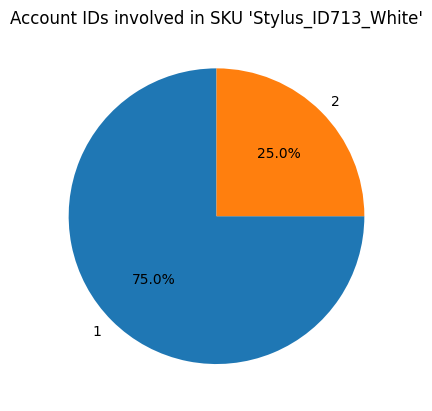

In [12]:
sku_df = df[df['sku'] == 'STYLUS_PEN_BLACK_shopsy']

# Count occurrences of each account ID for this SKU
account_counts = sku_df['account_id'].value_counts()

# Create a pie chart
plt.figure()
plt.pie(account_counts.values, labels=account_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Account IDs involved in SKU 'Stylus_ID713_White'")
plt.show()

In [13]:
target_slas = [2.0, 6, 3.0, 4, 5, 7]
filtered_df = df[df['delivery_sla'].isin(target_slas)]
grouped_counts = filtered_df.groupby(['delivery_sla', 'order_item_status'])['order_id'].count()
sla_counts = filtered_df.groupby('delivery_sla')['order_id'].count()
print("Number and percentage of 'CANCELLED' and 'RETURNED' orders for target delivery SLAs:")
for (sla, status), count in grouped_counts.items():
    percentage = (count / sla_counts[sla]) * 100
    print(f"Delivery SLA: {sla}, Status: {status}, Count: {count}, Percentage: {percentage:.2f}%")

Number and percentage of 'CANCELLED' and 'RETURNED' orders for target delivery SLAs:


In [14]:
sla_counts = df['delivery_sla'].value_counts()
print("Count of each delivery SLA:")
print(sla_counts)

Count of each delivery SLA:
delivery_sla
1970-01-01 00:00:00.000000002    7211
1970-01-01 00:00:00.000000003    6275
1970-01-01 00:00:00.000000005    4475
1970-01-01 00:00:00.000000004    4175
1970-01-01 00:00:00.000000006    3630
1970-01-01 00:00:00.000000001    2944
1970-01-01 00:00:00.000000007    2146
1970-01-01 00:00:00.000000008    1090
1970-01-01 00:00:00.000000000    1006
1970-01-01 00:00:00.000000009     524
1970-01-01 00:00:00.000000010     279
1970-01-01 00:00:00.000000011     177
1970-01-01 00:00:00.000000012     140
1970-01-01 00:00:00.000000013     101
1970-01-01 00:00:00.000000014      71
1970-01-01 00:00:00.000000016      54
1970-01-01 00:00:00.000000015      49
1970-01-01 00:00:00.000000018      41
1970-01-01 00:00:00.000000017      34
1970-01-01 00:00:00.000000019      21
1970-01-01 00:00:00.000000021      14
1970-01-01 00:00:00.000000020      13
1970-01-01 00:00:00.000000023       9
1970-01-01 00:00:00.000000022       9
1970-01-01 00:00:00.000000024       5
1970-01-0

In [15]:
df['delivery_sla'] = df['delivery_sla'].replace('2.0', 2).astype('Int64', errors='ignore')

In [16]:
df['delivery_sla'] = df['delivery_sla'].replace('3.0', 3).astype('Int64', errors='ignore')

In [17]:
df['delivery_sla'] = df['delivery_sla'].replace('4.0', 4).astype('Int64', errors='ignore')

In [18]:
df['delivery_sla'] = df['delivery_sla'].replace('5.0', 5).astype('Int64', errors='ignore')

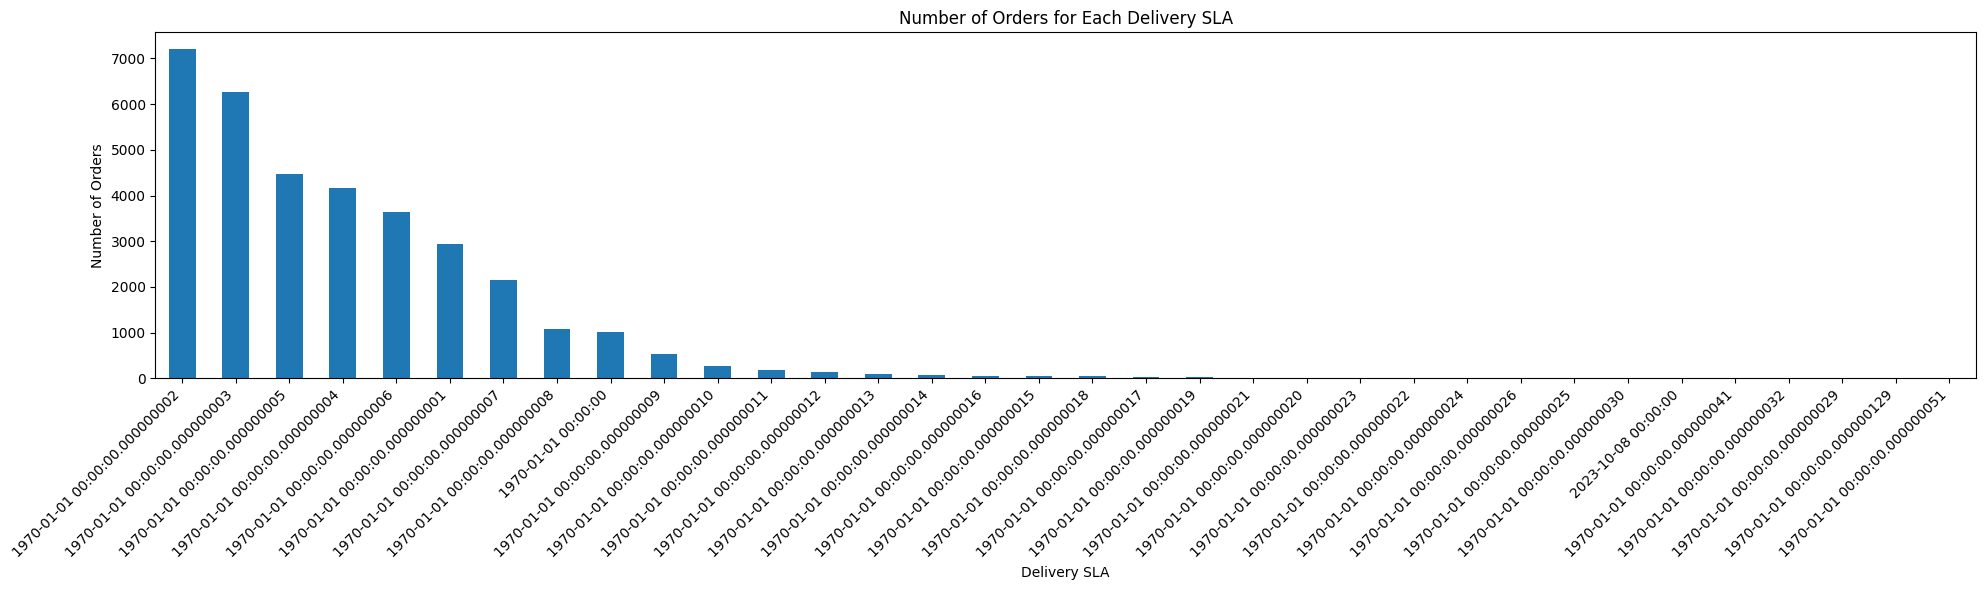

In [19]:
sla_counts = df['delivery_sla'].value_counts()
plt.figure(figsize=(20, 6))
sla_counts.plot(kind='bar')
plt.xlabel("Delivery SLA")
plt.ylabel("Number of Orders")
plt.title("Number of Orders for Each Delivery SLA")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
stylus_skus_df = df[df['sku'].str.startswith('STYLUS')]
account_counts = stylus_skus_df.groupby(['sku', 'account_id'])['order_id'].count()
print("Count of each account ID for SKUs starting with 'STYLUS':")
print(account_counts)

Count of each account ID for SKUs starting with 'STYLUS':
sku                      account_id
STYLUS_P11_WHT           1               36
STYLUS_PEN               2             7716
STYLUS_PEN_BLACK         2             2925
STYLUS_PEN_BLACK_shopsy  1                3
                         2                1
STYLUS_PEN_shopsy        1                3
                         2                1
STYLUS_WHI               1             9434
Name: order_id, dtype: int64


In [21]:
grouped = df.groupby(['fulfilment_source', 'order_item_status'])['order_id'].count()

# Calculate total orders for each fulfillment source
total_orders = df['fulfilment_source'].value_counts()

# Print the results
print("Number of Order Item Statuses within each Fulfilment Source:\n", grouped)
print("\nTotal Orders for each Fulfilment Source:\n", total_orders)

Number of Order Item Statuses within each Fulfilment Source:
 fulfilment_source   order_item_status
Seller              APPROVAL_HOLD            1
                    APPROVED                44
                    CANCELLED             5314
                    DELIVERED            28702
                    READY_TO_SHIP          320
                    REJECTED               165
                    RETURNED             14973
                    RETURN_REQUESTED       302
bhi_vas_wh_nl_01nl  APPROVED                 2
                    CANCELLED              303
                    DELIVERED             2231
                    READY_TO_SHIP           15
                    REJECTED                 9
                    RETURNED               926
                    RETURN_REQUESTED        26
gur_san_wh_nl_01nl  APPROVED                 6
                    CANCELLED             1276
                    DELIVERED             7885
                    READY_TO_SHIP           35
       

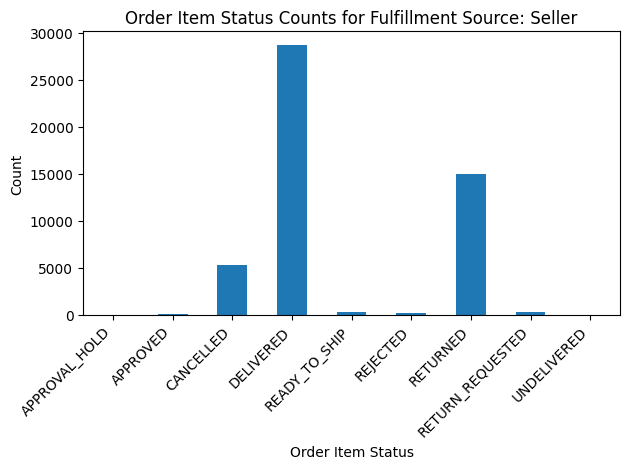

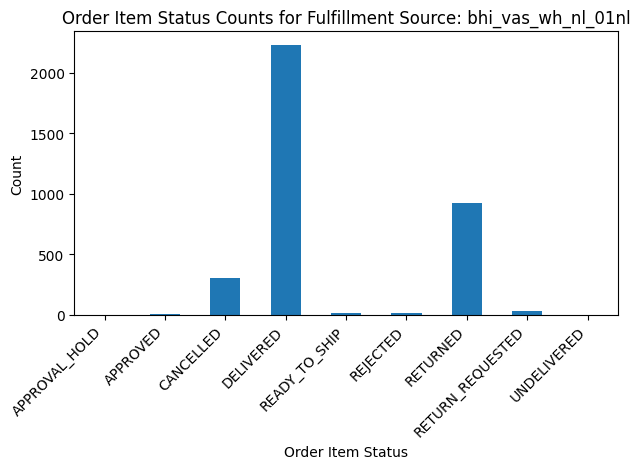

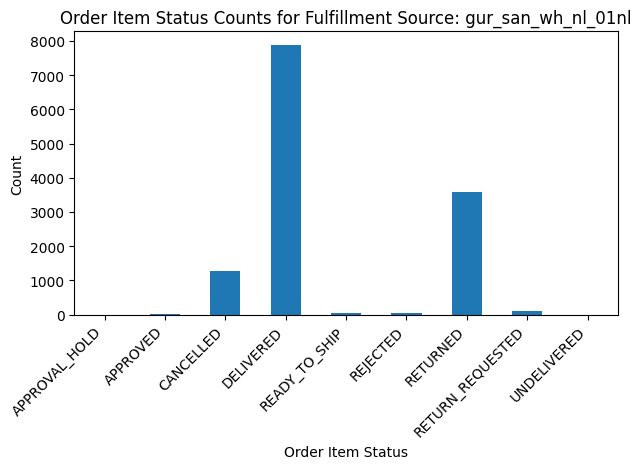

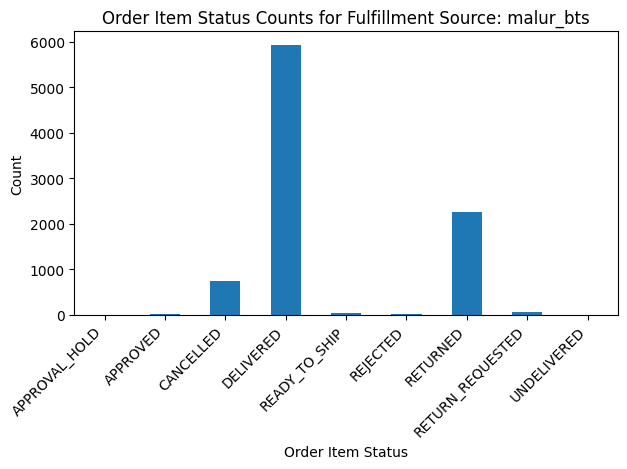

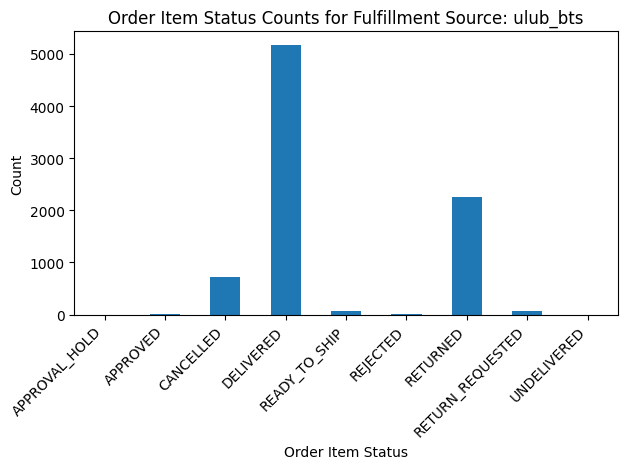

In [22]:
grouped = df.groupby(['fulfilment_source', 'order_item_status'])['order_id'].count().unstack()

# Plot a bar chart for each fulfillment source
for source in grouped.index:
    plt.figure()
    grouped.loc[source].plot(kind='bar')
    plt.title(f"Order Item Status Counts for Fulfillment Source: {source}")
    plt.xlabel("Order Item Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [23]:
status_counts = df['order_item_status'].value_counts()
print("Total occurrences of each order item status:")
print(status_counts)

Total occurrences of each order item status:
order_item_status
DELIVERED           49926
RETURNED            24009
CANCELLED            8395
RETURN_REQUESTED      541
READY_TO_SHIP         485
REJECTED              248
APPROVED               59
APPROVAL_HOLD           1
UNDELIVERED             1
Name: count, dtype: int64


In [24]:
df['return_reason'] = df['return_reason'].str.replace('QUALITY_ISSUES', 'QUALITY_ISSUE')
# Replace 'QUALITY_ISSUES' with 'QUALITY_ISSUE' in 'return_reason' column

In [25]:
retr_counts = df['return_reason'].value_counts()
print("Total occurrences of each order item status:")
print(retr_counts)

Total occurrences of each order item status:
return_reason
order_cancelled                  3296
QUALITY_ISSUE                    1698
ORC_validated with customer      1140
DEFECTIVE_PRODUCT                1047
SIZE_FIT_ISSUES                   719
ACCESSORY_DEFECTIVE               640
STYLE_FIT_ISSUE                   467
COLOR_FIT_SIZE_ISSUE              346
Rejected_by_Customer              312
DEAD_ON_ARRIVAL                   283
MISSHIPMENT                       227
COLOR_SIZE_ISSUE                  206
Attempts_Exhausted                184
MISSING_ITEM                      150
DAMAGED_PRODUCT                   148
shield_cancellation               105
CUSTOMER_UNWILLING_FOR_OBD        105
CUSTOMER_REMORSE                  104
Aged_beyond_Limit                  92
COLOR_STYLE_ISSUES                 85
Customer Rejection via OTP         82
DAMAGED_SHIPMENT_OBD               76
VENDOR_STATUS_NOT_CONFIGURED       64
return_cancelled                   59
Returnasperclientinstructions

In [26]:
# Filter for 'REJECTED' order items from Seller
seller_rejected_df = df[(df['order_item_status'] == 'RETURNED') & (df['fulfilment_source'] == 'Seller')]

# Group by 'sku' and count occurrences of 'REJECTED'
rejected_counts = seller_rejected_df.groupby('sku')['order_id'].count()

# Count all SKUs fulfilled by Seller
seller_counts = df[df['fulfilment_source'] == 'Seller'].groupby('sku')['order_id'].count()

# Calculate rejection rate and filter
rejection_rates = rejected_counts / seller_counts
high_rejection_skus = rejection_rates[rejection_rates > 0.25]

# Print the results
print("SKUs with return rate greater than 0.25 from Seller:")
print(high_rejection_skus)

SKUs with return rate greater than 0.25 from Seller:
sku
2COMPARTMENT_LUNCH BOX_BLUE    0.285714
3d Mobile stand-1              0.388889
4COMPARTMENT_LUNCH BOX_PINK    0.500000
5LAYER_PLASTIC_STORAGE_RACK    0.315789
5LAYER_WHEEL_WARDROBE_BLU_4    0.333333
                                 ...   
ZL1013 - A5-B1-B5-B2-B4--B6    0.333333
ZL1013-B3                      0.258065
Zhola_66_LTR_ORG_MULTI_3       1.000000
Zhola_66_LTR_ORG_MULTI_4       0.571429
stylus_pen_pack_of_2           0.470588
Name: order_id, Length: 368, dtype: float64


In [27]:
returned_seller_df = df[(df['fulfilment_source'] == 'Seller') & (df['order_item_status'] == 'RETURNED')]
returned_counts = returned_seller_df.groupby('sku')['order_id'].count()
seller_counts = df[df['fulfilment_source'] == 'Seller'].groupby('sku')['order_id'].count()
result_df = pd.DataFrame({
    'Returned': returned_counts,
    'Total by Seller': seller_counts
}).fillna(0).astype(int)
result_df = result_df[result_df['Returned'] > 0]
result_df = result_df.sort_values('Total by Seller', ascending=False)
print("SKUs sold by Seller and returned, with counts (sorted by total sold):")
print(result_df)

SKUs sold by Seller and returned, with counts (sorted by total sold):
                                Returned  Total by Seller
sku                                                      
STYLUS_PEN                          1435             5869
STYLUS_WHI                           656             3074
Stylus_ID713_White                   813             2457
STYLUS_PEN_BLACK                     619             2302
FSB-Stylus-Map                       533             2292
...                                  ...              ...
PL1051_Pack2_11-12_shopsy              1                1
PL1051_Pack2_7-8                       1                1
PL211_Pack4_17-18-19-20_shopsy         1                1
Blue_Rhombus_TRIPLE                    1                1
Ram_Mandir_Without-light               1                1

[536 rows x 2 columns]


In [28]:
top_10_skus = df['sku'].value_counts().nlargest(10)
print("Top 10 SKUs:")
print(top_10_skus)

Top 10 SKUs:
sku
STYLUS_WHI                              9434
STYLUS_PEN                              7716
Stylus_ID713_White                      6815
FSB-Stylus-Map                          6373
Stylus Black                            4552
Stylus_ID713_Black                      3688
STYLUS_PEN_BLACK                        2925
SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1    2912
TRIPLE_SOFA_COVER_BLEND_GEO             2537
Stylus_Pen_P8                           2450
Name: count, dtype: int64


In [29]:
target_skus = ['STYLUS_PEN', 'STYLUS_WHI', 'Stylus_ID713_White', 'Stylus Black', 'FSB-Stylus-Map']
for sku in target_skus:
    sku_df = df[df['sku'] == sku]
    total_orders = len(sku_df)
    cancelled_count = len(sku_df[sku_df['order_item_status'] == 'CANCELLED'])
    returned_count = len(sku_df[sku_df['order_item_status'] == 'RETURNED'])
    if total_orders > 0:
        cancelled_percentage = (cancelled_count / total_orders) * 100
        returned_percentage = (returned_count / total_orders) * 100
    else:
        cancelled_percentage = 0
        returned_percentage = 0
    print(f"For SKU '{sku}':")
    print(f"  Percentage of 'CANCELLED' orders: {cancelled_percentage:.2f}%")
    print(f"  Percentage of 'RETURNED' orders: {returned_percentage:.2f}%")
    print()

For SKU 'STYLUS_PEN':
  Percentage of 'CANCELLED' orders: 8.28%
  Percentage of 'RETURNED' orders: 23.67%

For SKU 'STYLUS_WHI':
  Percentage of 'CANCELLED' orders: 10.00%
  Percentage of 'RETURNED' orders: 20.81%

For SKU 'Stylus_ID713_White':
  Percentage of 'CANCELLED' orders: 12.03%
  Percentage of 'RETURNED' orders: 31.94%

For SKU 'Stylus Black':
  Percentage of 'CANCELLED' orders: 10.57%
  Percentage of 'RETURNED' orders: 25.40%

For SKU 'FSB-Stylus-Map':
  Percentage of 'CANCELLED' orders: 13.07%
  Percentage of 'RETURNED' orders: 23.27%



In [30]:
grouped_counts = df.groupby(['account_id', 'order_item_status'])['order_id'].count()
account_counts = df.groupby('account_id')['order_id'].count()
for account_id, data in grouped_counts.groupby(level=0):
    print(f"\nAccount ID: {account_id} (Total orders: {account_counts[account_id]})")
    print(data)


Account ID: 1 (Total orders: 17226)
account_id  order_item_status
1           APPROVED                12
            CANCELLED             1838
            DELIVERED            10879
            READY_TO_SHIP           96
            REJECTED                43
            RETURNED              4249
            RETURN_REQUESTED       109
Name: order_id, dtype: int64

Account ID: 2 (Total orders: 66084)
account_id  order_item_status
2           APPROVAL_HOLD            1
            APPROVED                40
            CANCELLED             6519
            DELIVERED            38852
            READY_TO_SHIP          362
            REJECTED               203
            RETURNED             19689
            RETURN_REQUESTED       417
            UNDELIVERED              1
Name: order_id, dtype: int64

Account ID: 10 (Total orders: 87)
account_id  order_item_status
10          CANCELLED             2
            DELIVERED            63
            RETURNED             22
Name: order

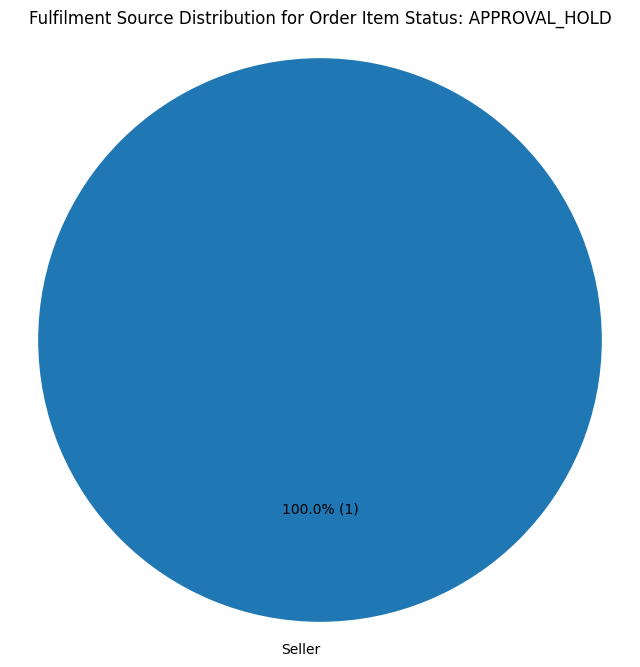

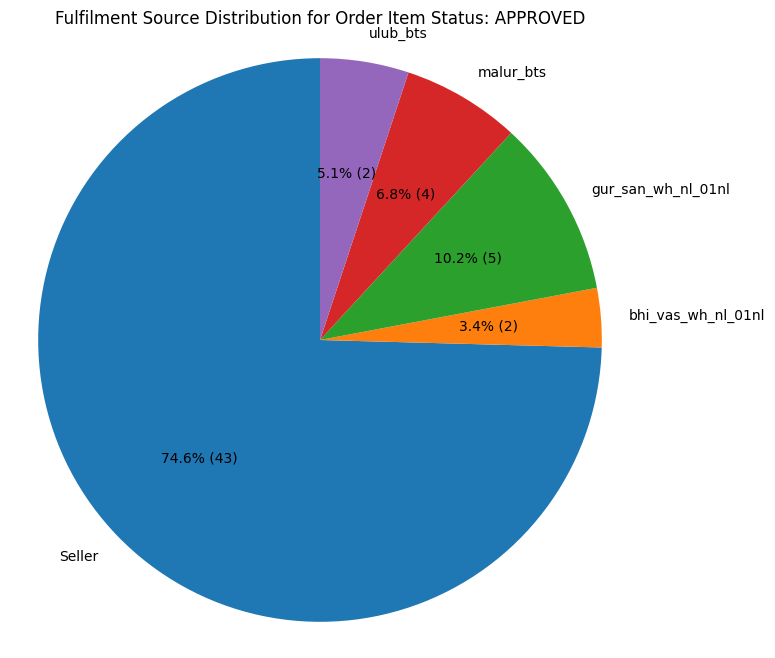

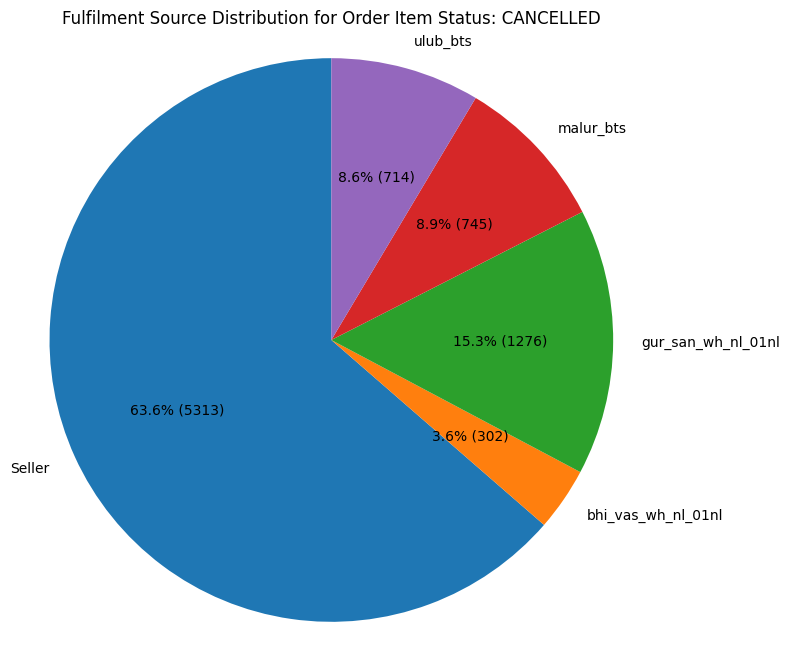

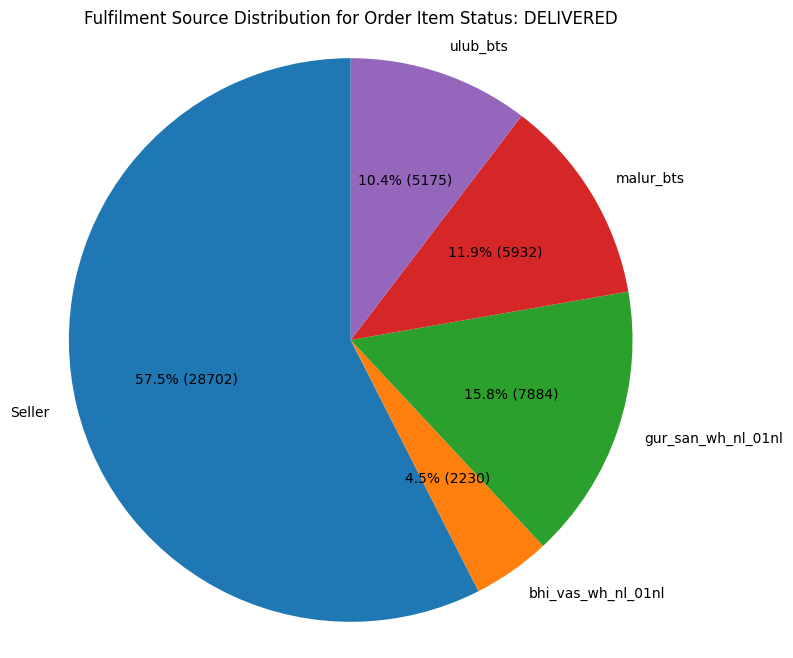

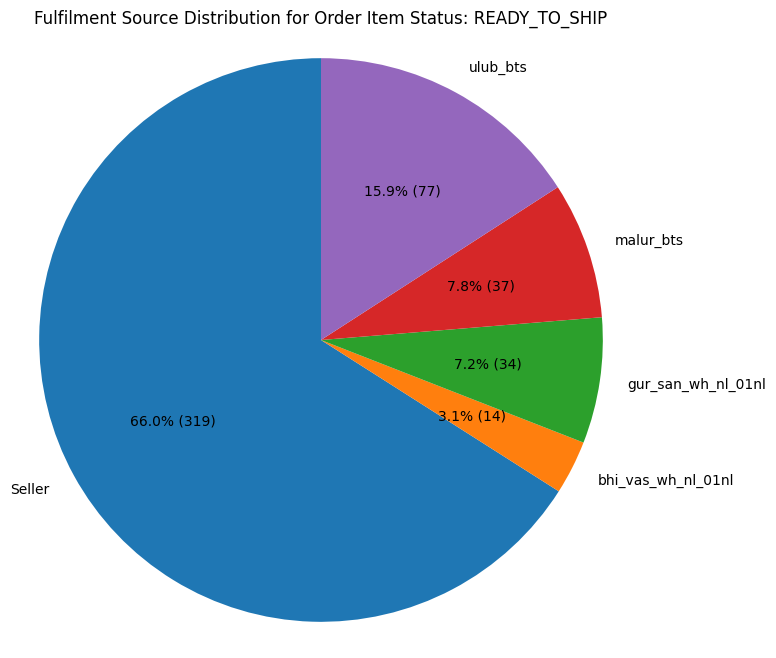

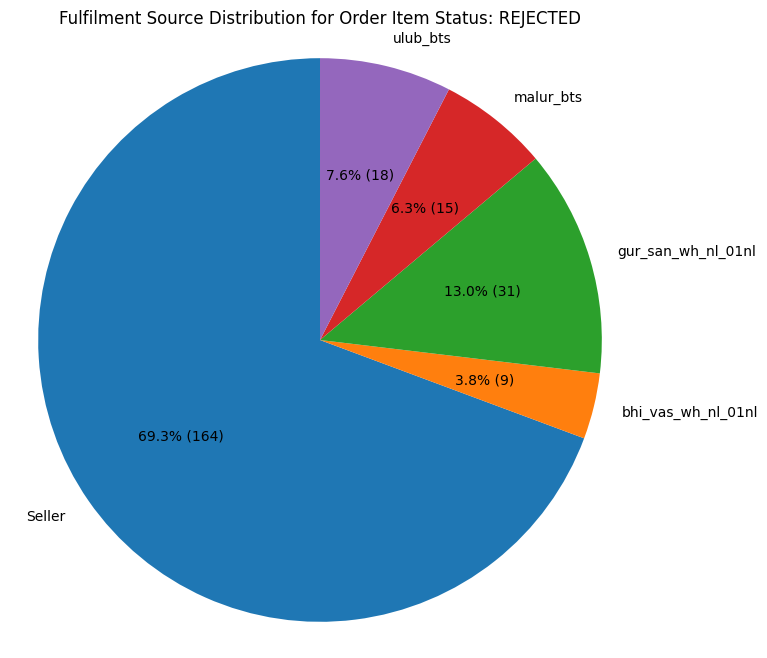

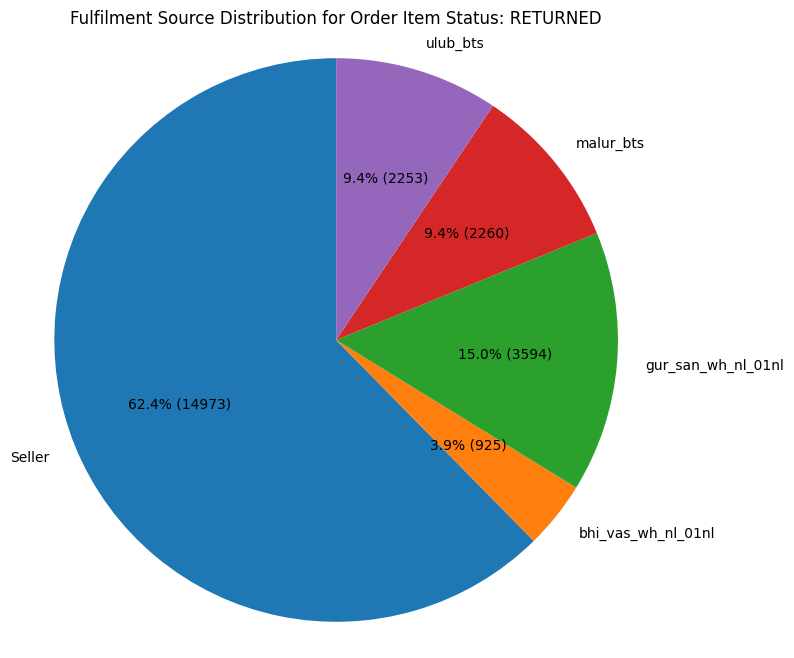

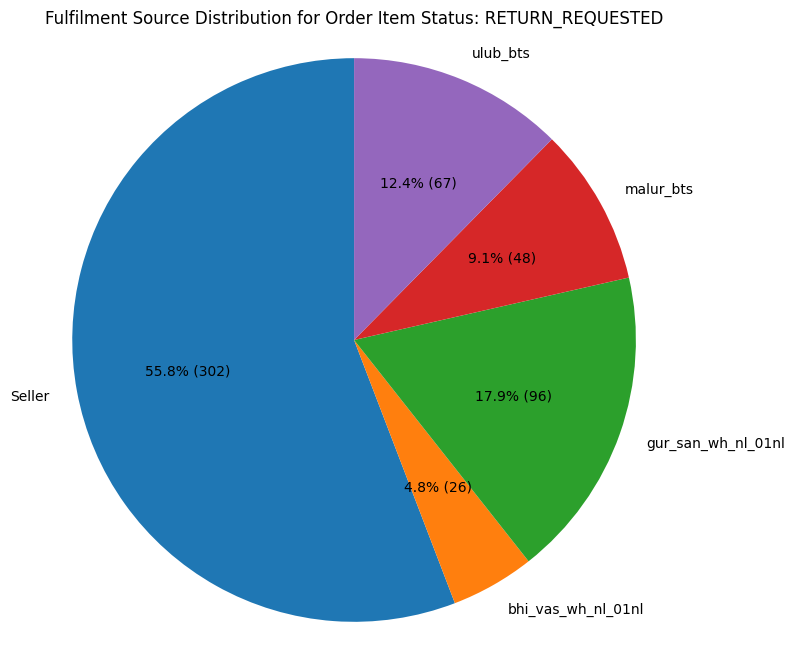

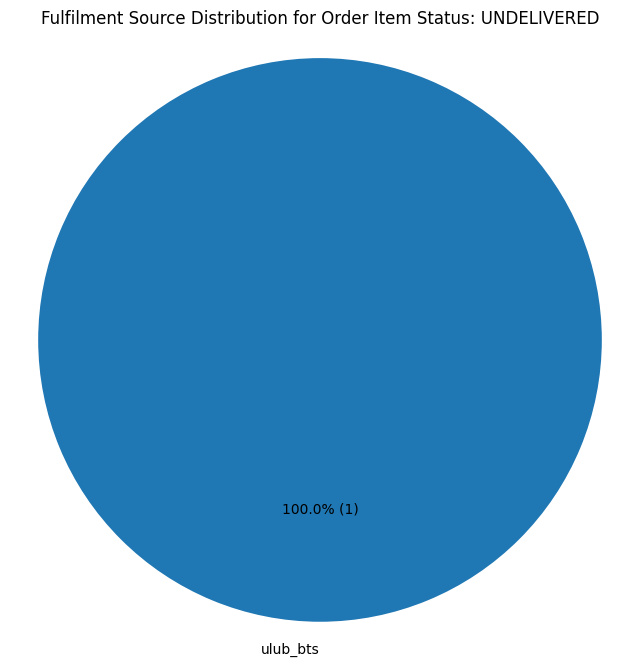

In [31]:
grouped = df.groupby(['order_item_status', 'fulfilment_source'])['order_id'].count()

for status, data in grouped.groupby(level=0):
    labels = data.index.get_level_values(1)
    sizes = data.values
    total = sum(sizes)

    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels,
                                      autopct=lambda pct: f"{pct:.1f}% ({int(pct/100.*total)})",
                                      startangle=90)

    ax.set_title(f"Fulfilment Source Distribution for Order Item Status: {status}")
    ax.axis('equal')
    plt.show()

In [32]:
target_statuses = ['CANCELLED', 'REJECTED', 'RETURNED', 'RETURN_REQUESTED']

for status in target_statuses:
    # Filter for the current status
    filtered_df = df[df['order_item_status'] == status]

    # Group by product title and count occurrences
    product_counts = filtered_df['sku'].value_counts()

    # Calculate percentage for each product title
    total_count = len(filtered_df)
    percentages = (product_counts / total_count) * 100

    # Print the top 10 product titles for the current status with percentages
    print(f"Top 10 sku for {status} status (with percentages):")
    for product, count in percentages.head(10).items():
        print(f"{product}: {count:.2f}%")
    print("-" * 30)

Top 10 sku for CANCELLED status (with percentages):
STYLUS_WHI: 11.23%
FSB-Stylus-Map: 9.92%
Stylus_ID713_White: 9.77%
STYLUS_PEN: 7.61%
Stylus Black: 5.73%
Stylus_ID713_Black: 5.38%
Stylus_Pen_P8: 3.54%
STYLUS_PEN_BLACK: 3.47%
FS-StylusPen-2W-Black: 3.44%
FS-StylusPen-2W-White: 2.51%
------------------------------
Top 10 sku for REJECTED status (with percentages):
Stylus_ID713_White: 9.68%
STYLUS_WHI: 8.87%
Stylus_ID713_Black: 8.06%
STYLUS_PEN: 4.44%
Stylus Black: 4.03%
FSB-Stylus-Map: 4.03%
SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1: 3.23%
Stylus_Pen_P8: 2.82%
RECHARGEABLE_FAN_RED_shopsy: 2.42%
SINGLE_SOFA_COVER_MULTI_PRISM: 2.42%
------------------------------
Top 10 sku for RETURNED status (with percentages):
Stylus_ID713_White: 9.07%
STYLUS_WHI: 8.18%
STYLUS_PEN: 7.61%
Stylus_ID713_Black: 6.43%
FSB-Stylus-Map: 6.18%
Stylus Black: 4.81%
Stylus_Pen_P8: 3.76%
SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1: 3.48%
STYLUS_PEN_BLACK: 3.27%
TRIPLE_SOFA_COVER_BLEND_GEO: 2.70%
-----------------------------

In [33]:
grouped = df.groupby(['product_title', 'order_item_status'])['order_id'].count().unstack(fill_value=0)


percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
sorted_percentages = percentages.loc[grouped.sum(axis=1).sort_values(ascending=False).index]
pd.set_option('display.max_colwidth', None)
print(sorted_percentages)

order_item_status                                                                                           APPROVAL_HOLD  \
product_title                                                                                                               
Kingone Upgraded Stylus Pen  iPad Pencil  Ultra High Precision & Sensitivity  Palm Stylus White                  0.006217   
Kingone Upgraded Stylus Pen  iPad Pencil  Ultra High Precision & Sensitivity  Palm Stylus Black                  0.000000   
Flipkart SmartBuy Upgraded Stylus Pen  Ultra High Precision & Sensitivity with Palm Rejection Stylus White       0.000000   
Flipkart SmartBuy TB016 2IN1 Passive Stylus White                                                                0.000000   
FurShine Polyester Abstract Sofa Cover Multicolor Pack of 1                                                      0.000000   
...                                                                                                                   ...   


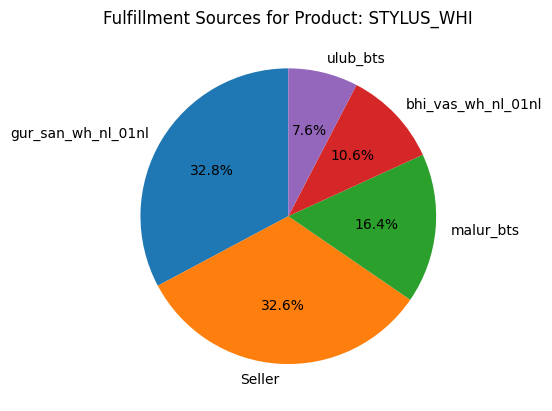

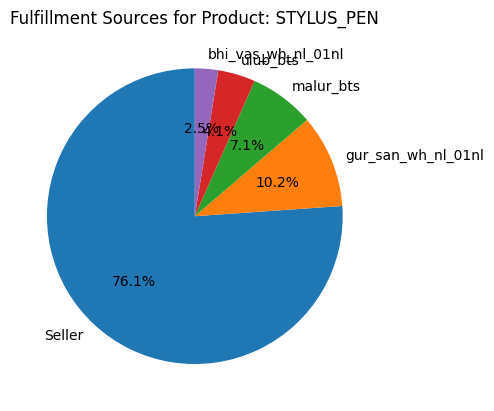

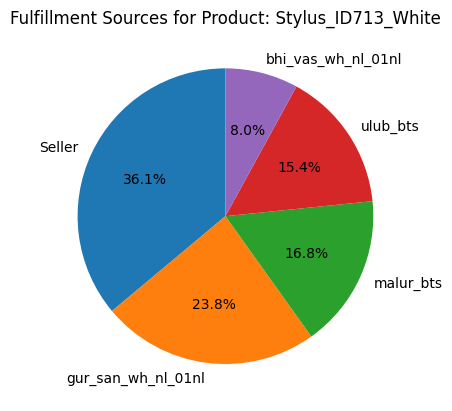

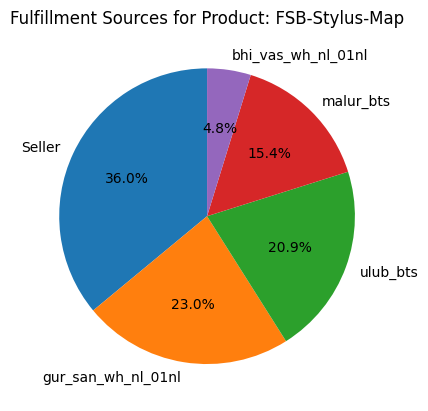

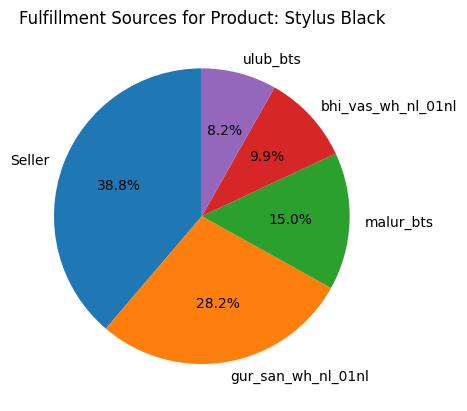

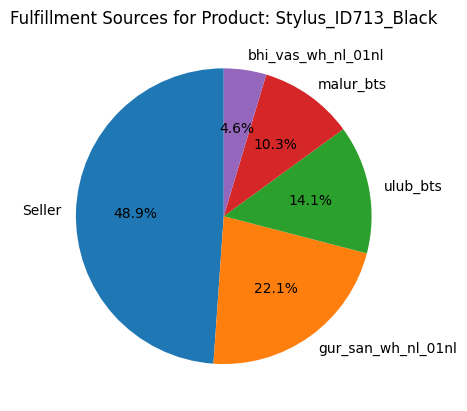

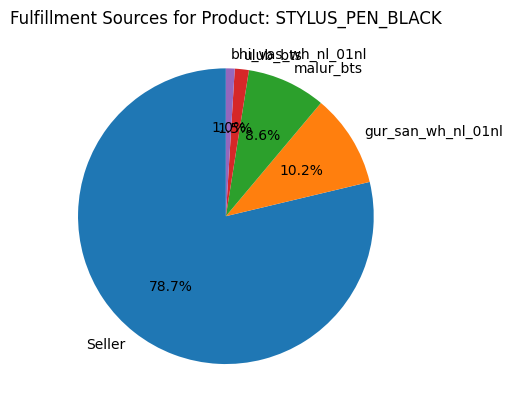

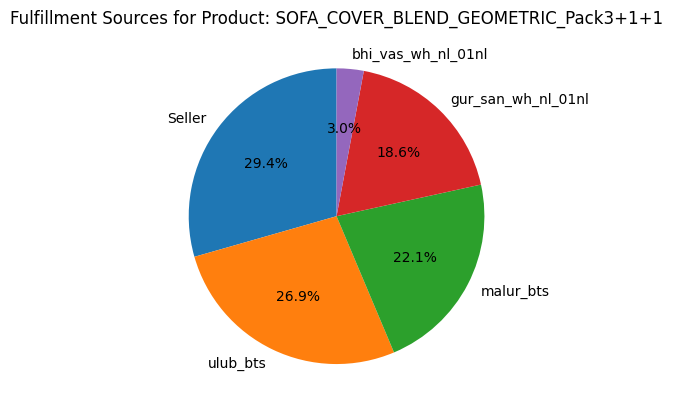

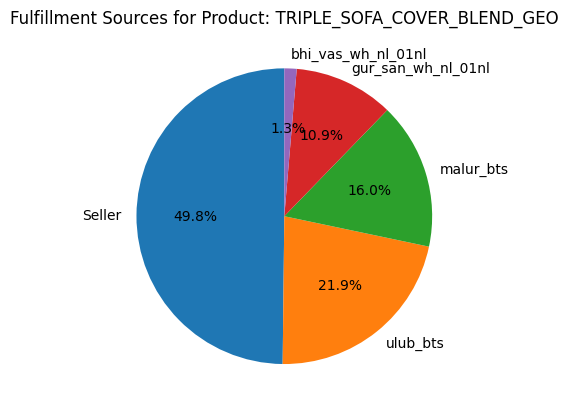

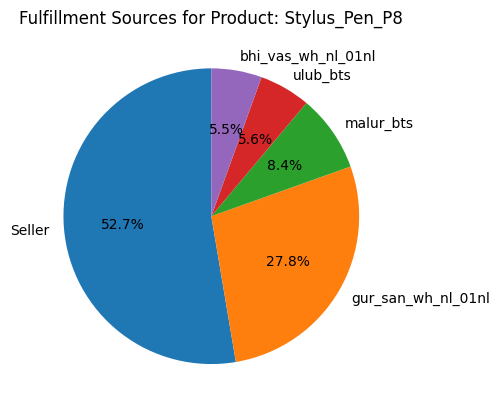

In [34]:
top_10_products = df['sku'].value_counts().nlargest(10).index
for product in top_10_products:
    product_df = df[df['sku'] == product]
    fulfillment_counts = product_df['fulfilment_source'].value_counts()
    percentages = fulfillment_counts / fulfillment_counts.sum() * 100
    plt.figure()
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Fulfillment Sources for Product: {product}')
    plt.show()

In [35]:
filtered_df = df[df['return_reason'].notna() & df['return_sub_reason'].notna()]
grouped_df = filtered_df.groupby(['sku', 'return_reason']).agg(
    return_count=('return_reason', 'count'),
    return_sub_reasons=('return_sub_reason', lambda x: x.tolist())
).reset_index()
product_total_returns = grouped_df.groupby('sku')['return_count'].sum().reset_index()
product_total_returns = product_total_returns.rename(columns={'return_count': 'total_product_returns'})
grouped_df = grouped_df.merge(product_total_returns, on='sku')
grouped_df = grouped_df.sort_values(['total_product_returns', 'return_count'], ascending=[False, False])
total_returns = len(filtered_df)
print("Return Reasons Grouped by Product Title (Descending Order of Product Frequency):")
current_product = None
for _, row in grouped_df.iterrows():
    sku = row['sku']
    return_reason = row['return_reason']
    return_count = row['return_count']
    total_product_returns = row['total_product_returns']
    return_sub_reasons_list = row['return_sub_reasons']
    percentage_of_returns = (return_count / total_returns) * 100

    if sku != current_product:

        print(f"\nProduct Title: {sku} (Total Returns: {total_product_returns})")
        current_product = sku

    print(f"  - Return Reason: {return_reason} (Count: {return_count}, {percentage_of_returns:.2f}%)")


    sub_reason_counts = pd.Series(return_sub_reasons_list).value_counts().head(5)
    for sub_reason, sub_reason_count in sub_reason_counts.items():
        print(f"    - Sub-Reason: {sub_reason} (Count: {sub_reason_count})")

Return Reasons Grouped by Product Title (Descending Order of Product Frequency):

Product Title: Stylus_ID713_White (Total Returns: 1302)
  - Return Reason: order_cancelled (Count: 353, 2.94%)
    - Sub-Reason: mind_changed (Count: 161)
    - Sub-Reason: quality_issues (Count: 54)
    - Sub-Reason: expensive_now (Count: 50)
    - Sub-Reason: delivery_time_long (Count: 33)
    - Sub-Reason: not_available_at_home (Count: 11)
  - Return Reason: QUALITY_ISSUE (Count: 231, 1.93%)
    - Sub-Reason: POOR_MATERIAL_MAKE (Count: 230)
    - Sub-Reason: DEFECTIVE_ACCESSORY (Count: 1)
  - Return Reason: DEFECTIVE_PRODUCT (Count: 174, 1.45%)
    - Sub-Reason: DEFECTIVE_PRODUCT_RECEIVED (Count: 89)
    - Sub-Reason: DETECTION_COMPATIBILITY_ISSUES (Count: 36)
    - Sub-Reason: DEVICE_POWER (Count: 17)
    - Sub-Reason: CONNECTIVITY (Count: 17)
    - Sub-Reason: SOFTWARE_ISSUES (Count: 15)
  - Return Reason: SIZE_FIT_ISSUES (Count: 165, 1.38%)
    - Sub-Reason: FIT_NOT_AS_EXPECTED (Count: 163)
    - Su

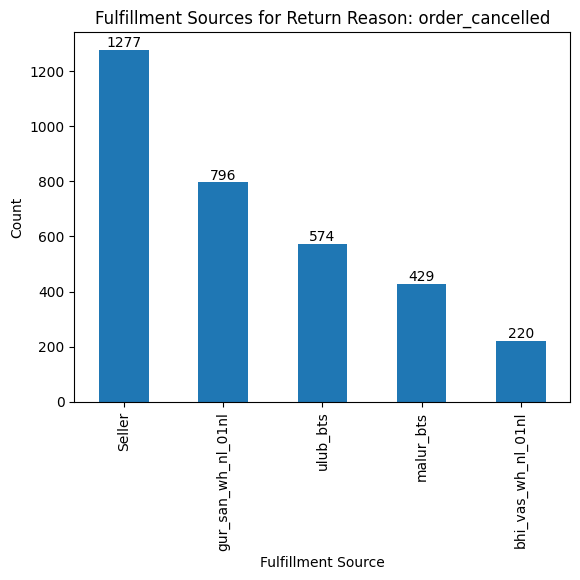

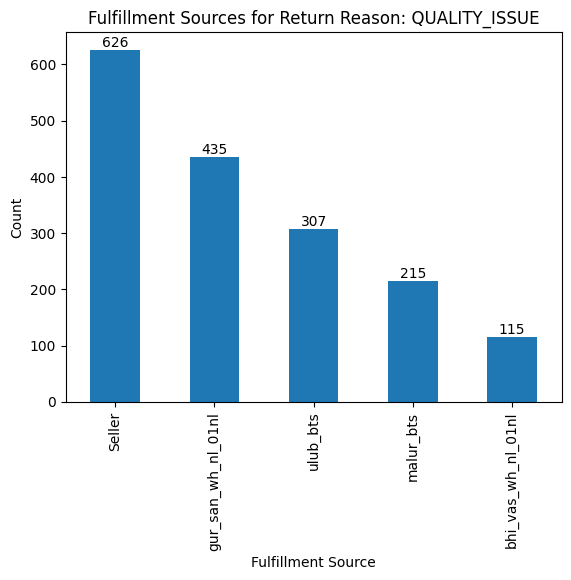

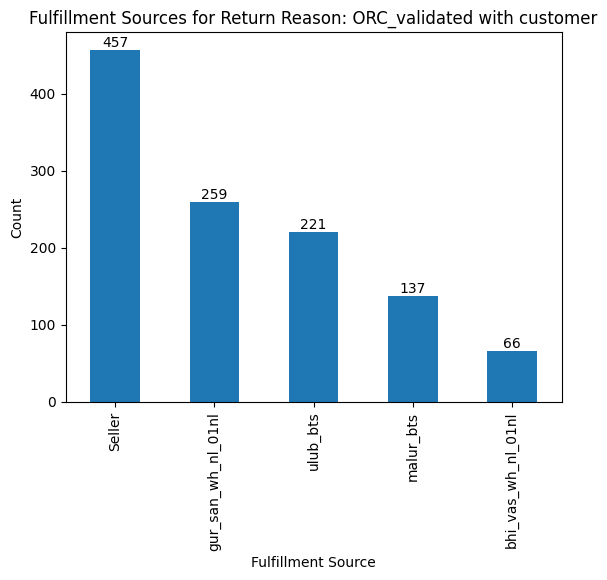

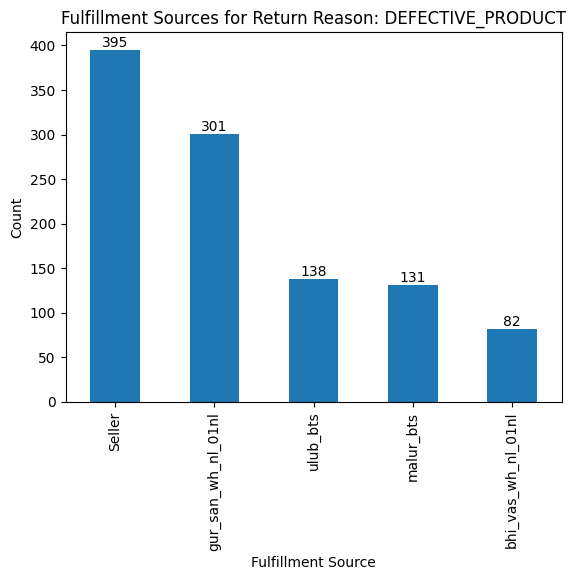

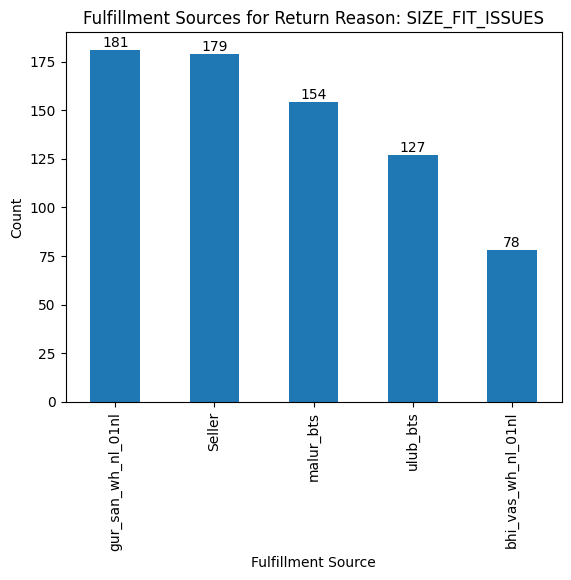

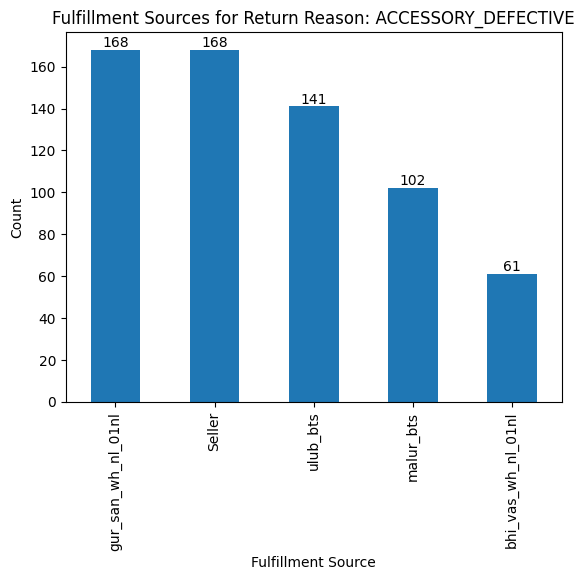

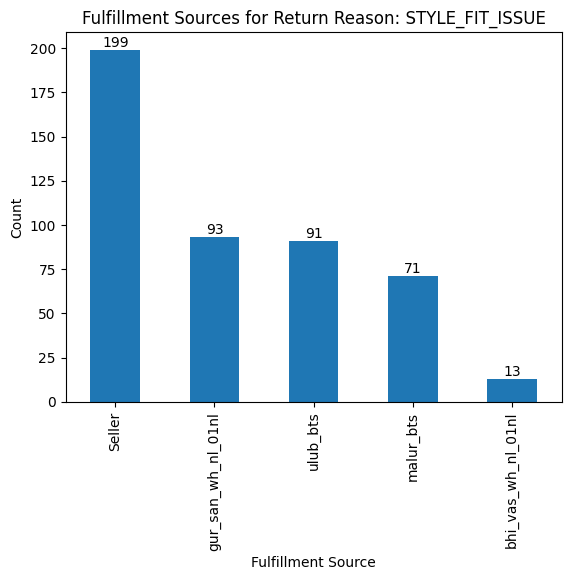

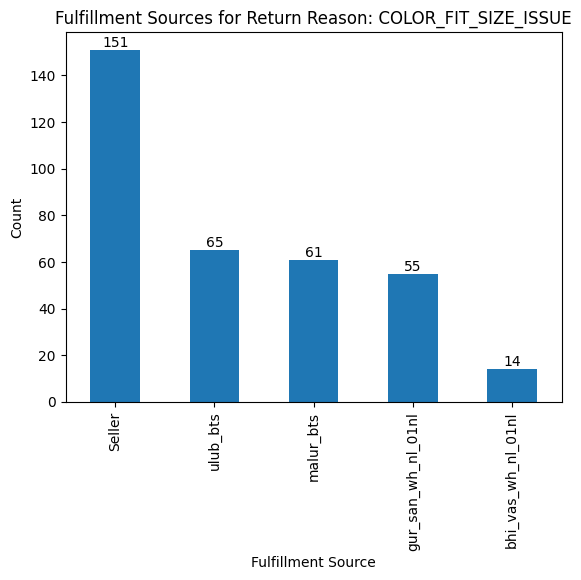

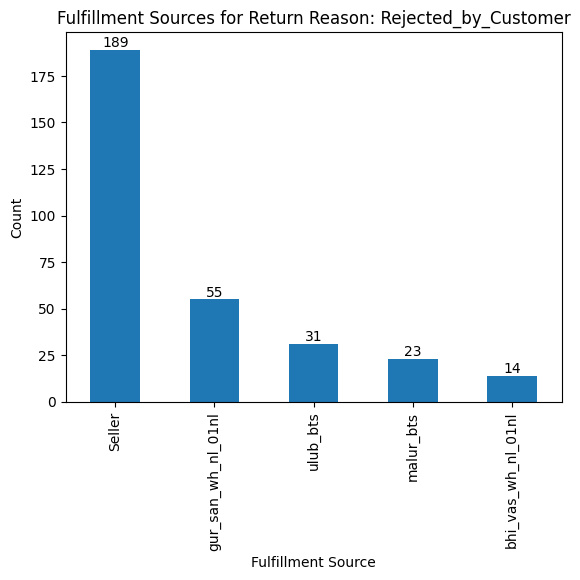

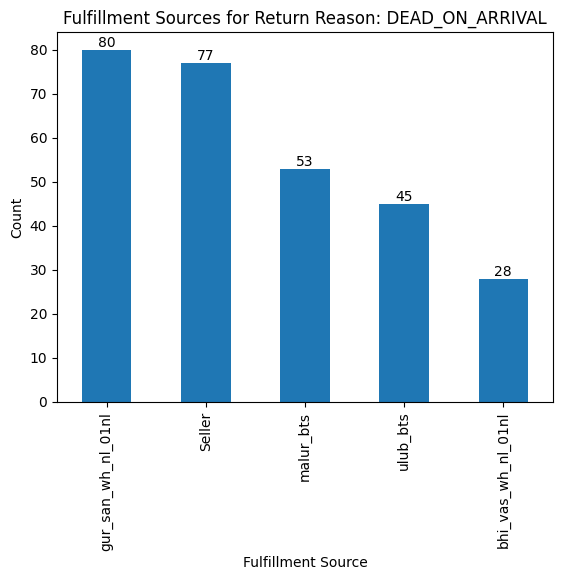

In [36]:
top_10_reasons = df['return_reason'].value_counts().head(10)
for reason in top_10_reasons.index:
    reason_df = df[df['return_reason'] == reason]
    fulfilment_counts = reason_df['fulfilment_source'].value_counts()

    plt.figure()
    ax = fulfilment_counts.plot(kind='bar')
    plt.title(f'Fulfillment Sources for Return Reason: {reason}')
    plt.xlabel('Fulfillment Source')
    plt.ylabel('Count')

    # Add number labels to the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    plt.show()

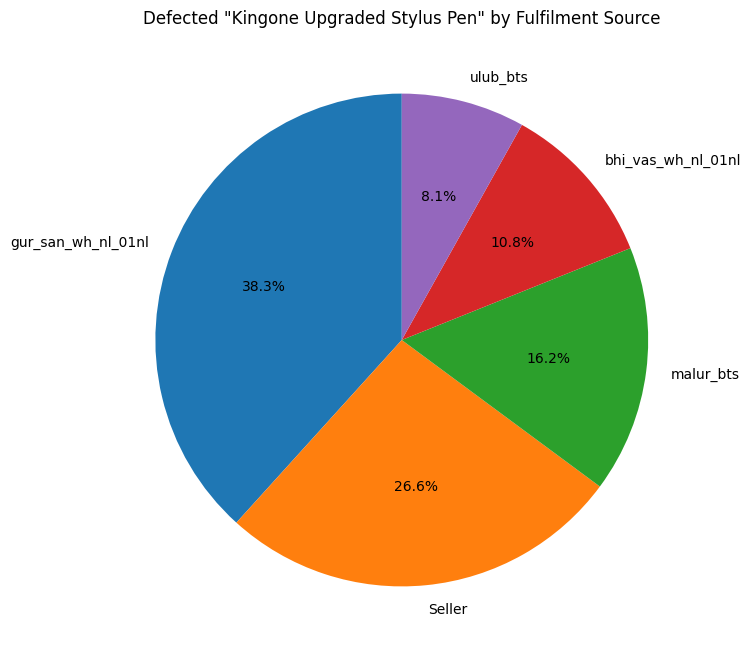

In [37]:
filtered_df = df[(df['product_title'] == 'Kingone Upgraded Stylus Pen  iPad Pencil  Ultra High Precision & Sensitivity  Palm Stylus White') &
                 (df['return_reason'] == 'DEFECTIVE_PRODUCT')]

if filtered_df.empty:
    print("No data found for the specified product and return reason.")
else:
    seller_counts = filtered_df['fulfilment_source'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(seller_counts, labels=seller_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Defected "Kingone Upgraded Stylus Pen" by Fulfilment Source')
    plt.show()

In [38]:
filtered_df = df[(df['product_title'] == 'Kingone Upgraded Stylus Pen  iPad Pencil  Ultra High Precision & Sensitivity  Palm Stylus White') &
                 (df['return_reason'] == 'QUALITY_ISSUES')]

if filtered_df.empty:
    print("No data found for the specified product and return reason.")
else:
    seller_counts = filtered_df['fulfilment_source'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(seller_counts, labels=seller_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Defected "Kingone Upgraded Stylus Pen" by Fulfilment Source')
    plt.show()

No data found for the specified product and return reason.


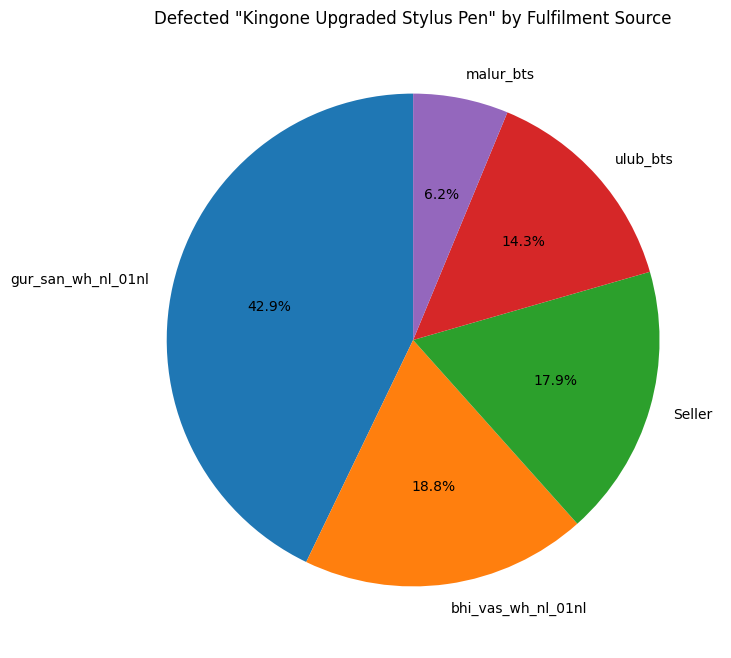

In [39]:
filtered_df = df[(df['product_title'] == 'Kingone Upgraded Stylus Pen  iPad Pencil  Ultra High Precision & Sensitivity  Palm Stylus White') &
                 (df['return_reason'] == 'ORC_validated with customer')]

if filtered_df.empty:
    print("No data found for the specified product and return reason.")
else:
    seller_counts = filtered_df['fulfilment_source'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(seller_counts, labels=seller_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Defected "Kingone Upgraded Stylus Pen" by Fulfilment Source')
    plt.show()

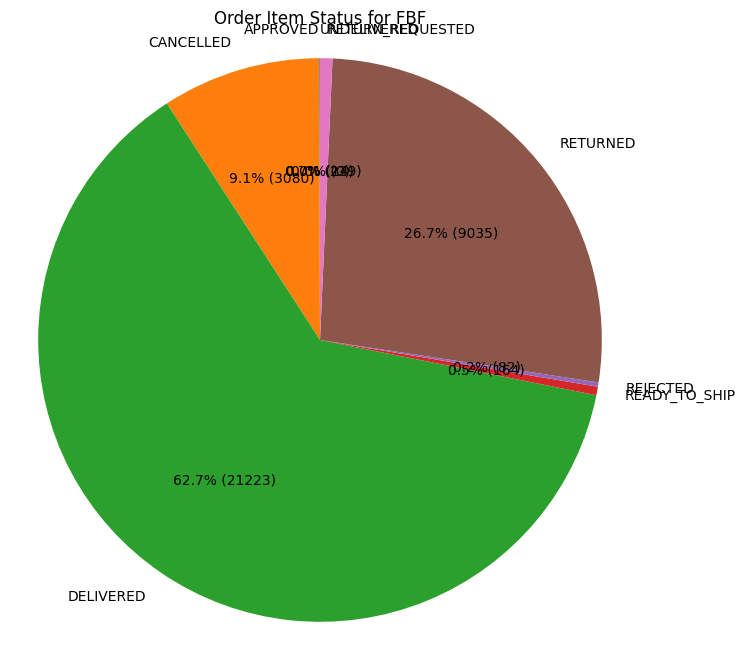

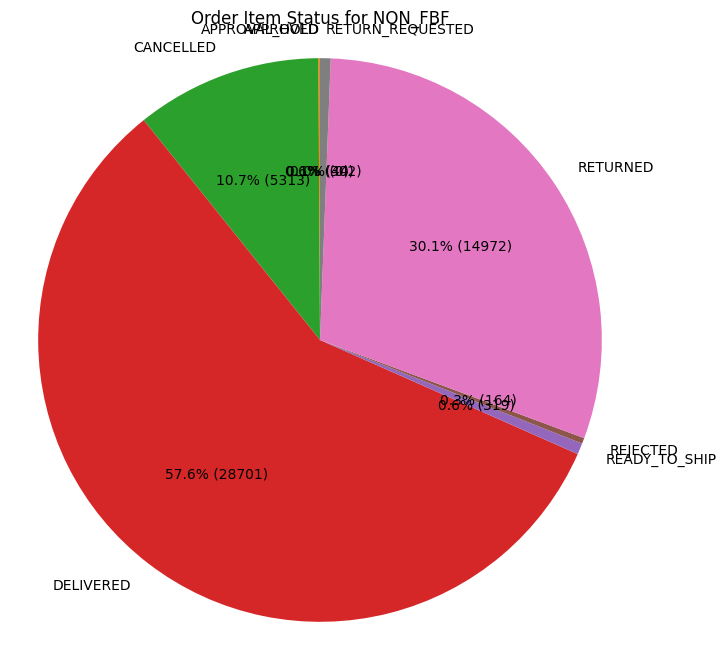

In [40]:
grouped = df.groupby(['fulfilment_type', 'order_item_status'])['order_id'].count()
for fulfilment, data in grouped.groupby(level=0):
    labels = data.index.get_level_values(1)
    sizes = data.values
    total = sum(sizes)

    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}% ({int(pct/100.*total)})", startangle=90)

    ax.set_title(f"Order Item Status for {fulfilment}")

    ax.axis('equal')

    plt.show()

FBF and NON-FBF don't show much difference. Above graph is irrevalent

In [41]:
print(set(df['order_item_status']))

{'RETURN_REQUESTED', 'UNDELIVERED', 'DELIVERED', 'READY_TO_SHIP', 'RETURNED', 'REJECTED', 'CANCELLED', 'APPROVED', 'APPROVAL_HOLD'}


In [42]:
grouped = df.groupby('product_title')['order_item_status'].agg(
    return_count=lambda x: x.eq('RETURNED').sum(),  # Count 'RETURNED' occurrences
    total_count='count'  # Count total occurrences
).reset_index()

# Calculate return rate
grouped['return_rate'] = (grouped['return_count'] / grouped['total_count']) * 100

# Sort by return rate in descending order
grouped = grouped.sort_values('return_rate', ascending=False)

# Print the results
for _, row in grouped.iterrows():
    print(f"Product Title: {row['product_title']}, Return Rate: {row['return_rate']:.2f}%, Number of Products: {row['total_count']}")

Product Title: 300 TC Microfiber Double Bedsheet Pack of 1  White, Return Rate: 100.00%, Number of Products: 1
Product Title: Pinkline Nude Smudge And Kiss Proof Lipstick Crayon Water-Resistant Long-Lasting Lips Magenta  2 g, Return Rate: 100.00%, Number of Products: 1
Product Title: Pinkline Multishades Set Cream Lipsticks Matte Finish Long Lasting Lipstick Multicolor 2  8 ml, Return Rate: 100.00%, Number of Products: 2
Product Title: Pinkline Matte High-Shine Lipstick - Velvety Nude Lip Color - Long Lasting Pack of 2 Tomorrow  Fashion  42 g, Return Rate: 100.00%, Number of Products: 1
Product Title: Pinkline Lipstick For Womens Long Lasting Matte Lipstick Hydrating Moisturizing Lipstick Rouge1  4.2 g, Return Rate: 100.00%, Number of Products: 2
Product Title: Pinkline Cream Lipsticks Matte Finish Long Lasting Lipstick Ruby Red  Traffic Red  10 g, Return Rate: 100.00%, Number of Products: 1
Product Title: Pinkline 2 IN 1 Waterproof Long Lasting Professional Creamy Matte Lipstick Pack 

In [43]:
unique_plp = df['pickup_logistics_partner'].unique()
print("Unique pickup_logistics_partner entries:")
for plp in unique_plp:
    print(plp)

Unique pickup_logistics_partner entries:
nan
flipkartlogistics-cod
flipkartlogistics
ecom-cod
delhivery-cod
Delhivery Volumetric Lastmile COD
delhivery-prepaid
ecom-prepaid
Delhivery Volumetric Lastmile Prepaid
Delivery E2E COD
Delhivery E2E Prepaid


In [44]:
df['pickup_logistics_partner'] = df['pickup_logistics_partner'].str.replace('delhivery-cod', 'Delhivery-cod')

In [45]:
df['pickup_logistics_partner'] = df['pickup_logistics_partner'].str.replace('delhivery-prepaid', 'Delhivery-prepaid')

In [46]:
order_counts = df.groupby('pickup_logistics_partner')['order_id'].count()
print("Number of Orders by Pickup Logistics Partner:")
print(order_counts)

Number of Orders by Pickup Logistics Partner:
pickup_logistics_partner
Delhivery E2E Prepaid                        5
Delhivery Volumetric Lastmile COD          131
Delhivery Volumetric Lastmile Prepaid       46
Delhivery-cod                             2064
Delhivery-prepaid                          884
Delivery E2E COD                            18
ecom-cod                                  1023
ecom-prepaid                               540
flipkartlogistics                        36229
flipkartlogistics-cod                    38732
Name: order_id, dtype: int64


In [47]:
grouped = df.groupby(['pickup_logistics_partner', 'order_item_status'])['order_id'].count()
total_orders = df['fulfilment_source'].value_counts()
print("Number of Order Item Statuses within each Fulfilment Source:\n", grouped)
print("\nTotal Orders for each Fulfilment Source:\n", total_orders)

Number of Order Item Statuses within each Fulfilment Source:
 pickup_logistics_partner               order_item_status
Delhivery E2E Prepaid                  DELIVERED                3
                                       READY_TO_SHIP            1
                                       RETURN_REQUESTED         1
Delhivery Volumetric Lastmile COD      CANCELLED               13
                                       DELIVERED               60
                                       READY_TO_SHIP            1
                                       RETURNED                57
Delhivery Volumetric Lastmile Prepaid  CANCELLED                5
                                       DELIVERED               30
                                       RETURNED                11
Delhivery-cod                          CANCELLED              251
                                       DELIVERED             1064
                                       READY_TO_SHIP           10
                       

In [48]:
grouped = df.groupby(['pickup_logistics_partner', 'order_item_status'])['order_id'].count()
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
total_orders = df['pickup_logistics_partner'].value_counts()
print("Percentages of Order Item Statuses within each Fulfilment Source:\n", percentages)
print("\nTotal Orders for each Fulfilment Source:\n", total_orders)

Percentages of Order Item Statuses within each Fulfilment Source:
 pickup_logistics_partner               pickup_logistics_partner               order_item_status
Delhivery E2E Prepaid                  Delhivery E2E Prepaid                  DELIVERED            60.000000
                                                                              READY_TO_SHIP        20.000000
                                                                              RETURN_REQUESTED     20.000000
Delhivery Volumetric Lastmile COD      Delhivery Volumetric Lastmile COD      CANCELLED             9.923664
                                                                              DELIVERED            45.801527
                                                                              READY_TO_SHIP         0.763359
                                                                              RETURNED             43.511450
Delhivery Volumetric Lastmile Prepaid  Delhivery Volumetric Lastmile Prepa

In [49]:
df['deliver_by_date'] = pd.to_datetime(df['deliver_by_date'], errors='coerce')
df['order_delivery_date'] = pd.to_datetime(df['order_delivery_date'], errors='coerce')

In [50]:
df['delivery_time_difference'] = df['order_delivery_date'] - df['deliver_by_date']
average_delivery_time = df['delivery_time_difference'].mean()
min_delivery_time = df['delivery_time_difference'].min()
max_delivery_time = df['delivery_time_difference'].max()
print("Average Delivery Time:", average_delivery_time)
print("Minimum Delivery Time:", min_delivery_time)
print("Maximum Delivery Time:", max_delivery_time)

Average Delivery Time: -1 days +09:22:53.955099507
Minimum Delivery Time: -129 days +00:00:00
Maximum Delivery Time: 15 days 00:00:00


In [51]:
count_negative_diff = (df['delivery_time_difference'] < pd.Timedelta(0)).sum()
print("Number of orders with delivery before promised date:", count_negative_diff)

Number of orders with delivery before promised date: 26674


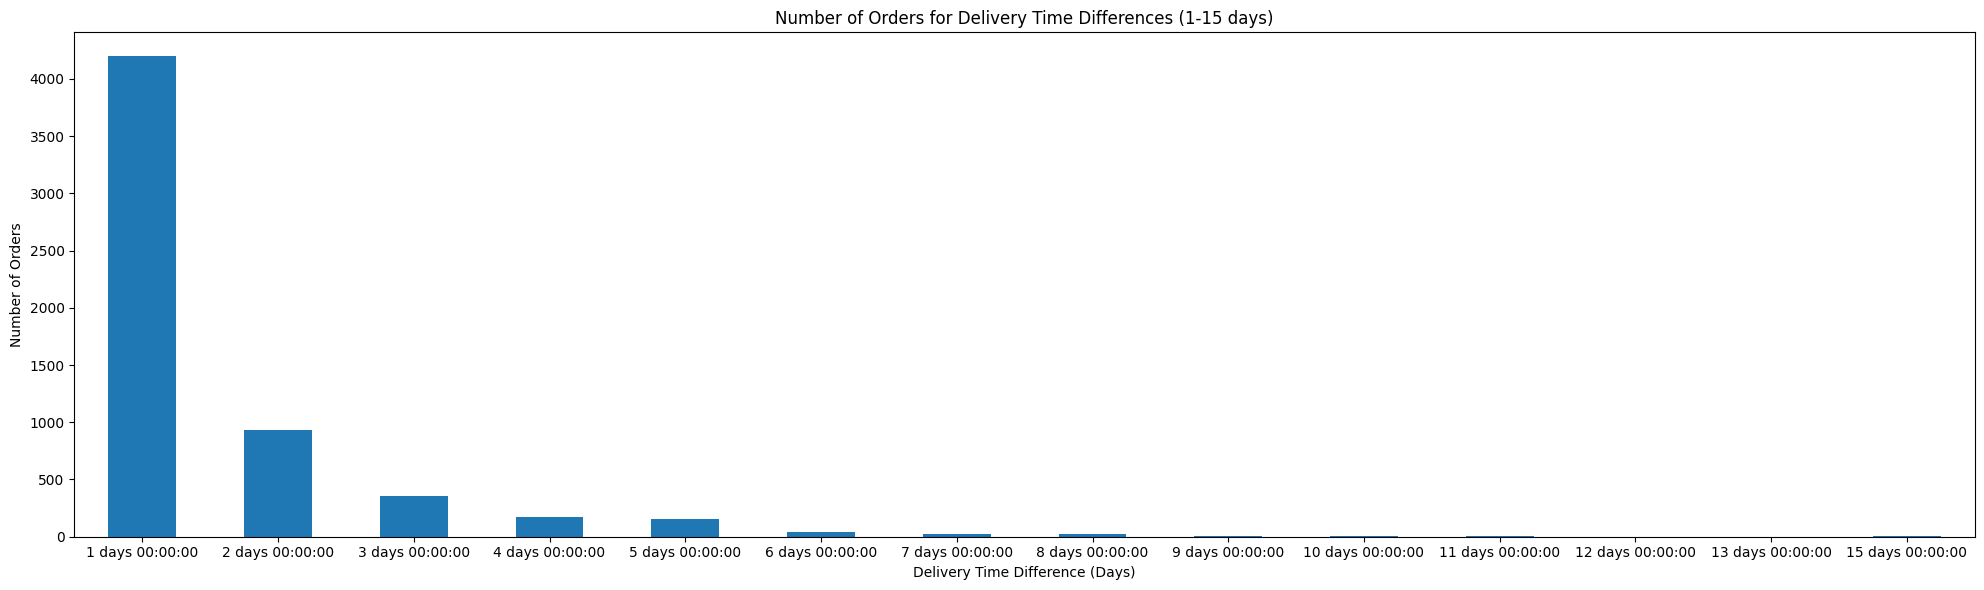

In [52]:
filtered_df = df[(df['delivery_time_difference'] >= pd.Timedelta(days=1)) & (df['delivery_time_difference'] <= pd.Timedelta(days=15))]
order_counts = filtered_df['delivery_time_difference'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
order_counts.plot(kind='bar')
plt.xlabel('Delivery Time Difference (Days)')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Delivery Time Differences (1-15 days)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
status_counts = filtered_df.groupby('delivery_time_difference')['order_item_status'].value_counts().unstack(fill_value=0)

if 'CANCELLED' in status_counts.columns:
    cancelled_counts = status_counts['CANCELLED']
else:
    cancelled_counts = pd.Series(0, index=status_counts.index)  # Create empty series if 'CANCELLED' is missing

if 'RETURNED' in status_counts.columns:
    returned_counts = status_counts['RETURNED']
else:
    returned_counts = pd.Series(0, index=status_counts.index)  # Create empty series if 'RETURNED' is missing

# Print the results
print("Number of Cancelled products for each delivery time difference:\n", cancelled_counts)
print("\nNumber of Returned products for each delivery time difference:\n", returned_counts)

Number of Cancelled products for each delivery time difference:
 delivery_time_difference
1 days     0
2 days     0
3 days     0
4 days     0
5 days     0
6 days     0
7 days     0
8 days     0
9 days     0
10 days    0
11 days    0
12 days    0
13 days    0
15 days    0
dtype: int64

Number of Returned products for each delivery time difference:
 delivery_time_difference
1 days     833
2 days     178
3 days      68
4 days      44
5 days      38
6 days       7
7 days       5
8 days       3
9 days       0
10 days      2
11 days      0
12 days      1
13 days      0
15 days      0
Name: RETURNED, dtype: int64


In [54]:
top_5_skus = df['sku'].value_counts().nlargest(5).index
for sku in top_5_skus:
    sku_df = df[df['sku'] == sku]
    partner_counts = sku_df['pickup_logistics_partner'].value_counts()
    print(f"For SKU: {sku}")
    print(partner_counts)
    print()

For SKU: STYLUS_WHI
pickup_logistics_partner
flipkartlogistics        5257
flipkartlogistics-cod    3404
Delhivery-cod             129
Delhivery-prepaid          97
ecom-prepaid               85
ecom-cod                   78
Name: count, dtype: int64

For SKU: STYLUS_PEN
pickup_logistics_partner
flipkartlogistics        3769
flipkartlogistics-cod    2477
Delhivery-cod             123
Delhivery-prepaid          98
ecom-cod                   29
ecom-prepaid               21
Name: count, dtype: int64

For SKU: Stylus_ID713_White
pickup_logistics_partner
flipkartlogistics        3938
flipkartlogistics-cod    2372
Delhivery-cod              88
Delhivery-prepaid          88
ecom-prepaid               47
ecom-cod                   43
Name: count, dtype: int64

For SKU: FSB-Stylus-Map
pickup_logistics_partner
flipkartlogistics        3376
flipkartlogistics-cod    2455
Delhivery-cod             116
Delhivery-prepaid          81
ecom-prepaid               70
ecom-cod                   59
Name: c

In [55]:
top_5_skus = df['sku'].value_counts().nlargest(5).index

# Iterate through the top 5 SKUs
for sku in top_5_skus:
    # Filter the dataframe for the current SKU
    sku_df = df[df['sku'] == sku]

    # Group the data and count occurrences
    grouped = sku_df.groupby(['pickup_logistics_partner', 'order_item_status'])['order_id'].count()

    # Print the results for the current SKU
    print(f"For SKU: {sku}")
    print(grouped)
    print()

For SKU: STYLUS_WHI
pickup_logistics_partner  order_item_status
Delhivery-cod             CANCELLED              25
                          DELIVERED              76
                          READY_TO_SHIP           1
                          RETURNED               27
Delhivery-prepaid         CANCELLED              11
                          DELIVERED              67
                          RETURNED               19
ecom-cod                  CANCELLED              11
                          DELIVERED              41
                          READY_TO_SHIP           2
                          RETURNED               24
ecom-prepaid              APPROVED                1
                          CANCELLED               8
                          DELIVERED              58
                          RETURNED               15
                          RETURN_REQUESTED        3
flipkartlogistics         APPROVED                2
                          CANCELLED             416


In [56]:
grouped = sku_df.groupby(['pickup_logistics_partner', 'order_item_status'])['order_id'].count()

# Calculate the percentages
percentages = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Print the percentages
print(percentages)

pickup_logistics_partner  pickup_logistics_partner  order_item_status
Delhivery-cod             Delhivery-cod             CANCELLED             9.722222
                                                    DELIVERED            55.555556
                                                    READY_TO_SHIP         1.388889
                                                    RETURNED             33.333333
Delhivery-prepaid         Delhivery-prepaid         CANCELLED            14.925373
                                                    DELIVERED            58.208955
                                                    RETURNED             26.865672
ecom-cod                  ecom-cod                  CANCELLED            13.043478
                                                    DELIVERED            43.478261
                                                    RETURNED             26.086957
                                                    RETURN_REQUESTED     17.391304
ecom-prepaid     

In [57]:
grouped = df.groupby(['pickup_logistics_partner', 'order_item_status'])['order_id'].count()
total_orders = df['pickup_logistics_partner'].value_counts()
for partner in total_orders.index:
    cancelled_count = grouped.loc[(partner, 'CANCELLED')] if (partner, 'CANCELLED') in grouped.index else 0
    returned_count = grouped.loc[(partner, 'RETURNED')] if (partner, 'RETURNED') in grouped.index else 0

    cancelled_percentage = (cancelled_count / total_orders[partner]) * 100
    returned_percentage = (returned_count / total_orders[partner]) * 100

    print(f"Pickup Logistics Partner: {partner}")
    print(f"  Percentage of CANCELLED orders: {cancelled_percentage:.2f}%")
    print(f"  Percentage of RETURNED orders: {returned_percentage:.2f}%")
    print()

Pickup Logistics Partner: flipkartlogistics-cod
  Percentage of CANCELLED orders: 12.27%
  Percentage of RETURNED orders: 32.04%

Pickup Logistics Partner: flipkartlogistics
  Percentage of CANCELLED orders: 7.83%
  Percentage of RETURNED orders: 25.10%

Pickup Logistics Partner: Delhivery-cod
  Percentage of CANCELLED orders: 12.16%
  Percentage of RETURNED orders: 34.93%

Pickup Logistics Partner: ecom-cod
  Percentage of CANCELLED orders: 12.12%
  Percentage of RETURNED orders: 31.96%

Pickup Logistics Partner: Delhivery-prepaid
  Percentage of CANCELLED orders: 10.41%
  Percentage of RETURNED orders: 23.08%

Pickup Logistics Partner: ecom-prepaid
  Percentage of CANCELLED orders: 11.67%
  Percentage of RETURNED orders: 24.07%

Pickup Logistics Partner: Delhivery Volumetric Lastmile COD
  Percentage of CANCELLED orders: 9.92%
  Percentage of RETURNED orders: 43.51%

Pickup Logistics Partner: Delhivery Volumetric Lastmile Prepaid
  Percentage of CANCELLED orders: 10.87%
  Percentage 

In [58]:
partner_counts = df['pickup_logistics_partner'].value_counts()
print(partner_counts)

pickup_logistics_partner
flipkartlogistics-cod                    38732
flipkartlogistics                        36229
Delhivery-cod                             2064
ecom-cod                                  1023
Delhivery-prepaid                          884
ecom-prepaid                               540
Delhivery Volumetric Lastmile COD          131
Delhivery Volumetric Lastmile Prepaid       46
Delivery E2E COD                            18
Delhivery E2E Prepaid                        5
Name: count, dtype: int64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83665 entries, 0 to 83666
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   order_item_id                     83665 non-null  object         
 1   order_id                          83665 non-null  object         
 2   fulfilment_source                 83613 non-null  object         
 3   fulfilment_type                   83665 non-null  object         
 4   order_date                        83665 non-null  datetime64[ns] 
 5   order_approval_date               83241 non-null  object         
 6   order_item_status                 83665 non-null  object         
 7   sku                               83665 non-null  object         
 8   fsn                               83665 non-null  object         
 9   product_title                     83665 non-null  object         
 10  order_quantity                    83665

In [60]:
for title in df['product_title'].unique():
    print(title)

Kingone Upgraded Stylus Pen iPad Pencil Ultra High Precision & Sensitivity Palm Stylus White””
Kingone Upgraded Stylus Pen iPad Pencil Ultra High Precision & Sensitivity Palm Stylus Black””
Kingone Upgraded Stylus Pen iPad Pencil Ultra High Precision & Sensitivity Pack of 2 Stylus White
Solid Single Fleece Blanket Polyester  Multicolor
Polyester Chair Cover Grey Pack of 4
Boxn by Boxn Auto Shut-off Stainless Steel Cordless Design Electric Kettle Multi Cooker Electric Kettle 2 L  Silver
Whitecherry Arctic Air Portable 3 In1 Conditioner Purifier Mini Cooler Arctic Air Humidifier Arctic Air Portable Blue USB Air Cooler Blue
Polyester Chair Cover Mustard Pack of 4
Whitecherry Mini USB Fragrance Air Cooling Fan Portable Desktop Dual Blower Portable Green Air Cooling Fan USB Air Cooler Green
Bitcoin HAIR DRYER WITH FOLDABLE MULTI COLOR Hair Dryer 1000 W  Multicolor
Whitecherry Mini USB Fragrance Air Cooling Fan Portable Desktop Dual Blower Portable Blue Air Cooling Fan USB Air Cooler Blue
WH

In [61]:
df['Company'] = df['product_title'].str.split().str[0]

In [62]:
unique_companies_df = pd.DataFrame(sorted(df['Company'].unique()), columns=['Company'])
print(unique_companies_df)

      Company
0         300
1        AAAV
2        AMAR
3     Aksvita
4     AmazeMe
..        ...
117    shanol
118  techsale
119     texla
120      vedo
121     zofia

[122 rows x 1 columns]


In [63]:
company_counts = df['Company'].value_counts()
total_companies = len(df)
company_percentages = (company_counts / total_companies) * 100

top_5_companies = company_percentages.head(5)

print("Top 5 Companies and Their Count Percentages:")
for company, percentage in top_5_companies.items():
    print(f"{company}: {percentage:.2f}%")

Top 5 Companies and Their Count Percentages:
Kingone: 34.54%
Flipkart: 26.15%
FurShine: 18.74%
Whitecherry: 5.59%
Polyester: 3.84%


use

# Returns

In [64]:
for status in df['order_item_status'].unique():
    print(status)

DELIVERED
RETURNED
CANCELLED
REJECTED
RETURN_REQUESTED
READY_TO_SHIP
APPROVED
APPROVAL_HOLD
UNDELIVERED


In [65]:
returned_orders = df[df['order_item_status'] == 'RETURNED']

In [66]:
return_reason_counts = returned_orders['return_reason'].value_counts()

In [67]:
for reason, count in return_reason_counts.items():
    print(f"{reason}: {count}")


order_cancelled: 3296
QUALITY_ISSUE: 1698
ORC_validated with customer: 1140
DEFECTIVE_PRODUCT: 1046
SIZE_FIT_ISSUES: 719
ACCESSORY_DEFECTIVE: 640
STYLE_FIT_ISSUE: 467
COLOR_FIT_SIZE_ISSUE: 346
Rejected_by_Customer: 312
DEAD_ON_ARRIVAL: 283
MISSHIPMENT: 227
COLOR_SIZE_ISSUE: 206
Attempts_Exhausted: 184
MISSING_ITEM: 150
DAMAGED_PRODUCT: 148
shield_cancellation: 105
CUSTOMER_UNWILLING_FOR_OBD: 105
CUSTOMER_REMORSE: 104
Aged_beyond_Limit: 92
COLOR_STYLE_ISSUES: 85
Customer Rejection via OTP: 82
DAMAGED_SHIPMENT_OBD: 76
VENDOR_STATUS_NOT_CONFIGURED: 64
return_cancelled: 59
Returnasperclientinstructions: 53
Attempt_Exhausted: 33
shipment_rto_completed: 30
Corresponding_Pickup_Rejected: 28
MP_CANCELLATION: 25
WARRANTY_RELATED: 22
Uncontrollable_factors: 22
Shipment_Unattended: 20
ITEM_NOT_AS_DESCRIBED: 19
RTO-FROM-EKL: 16
RFRPromiseBreached: 15
Shipment_lost: 15
SMART_PICKUP_CHECK_OVERRIDE: 15
Shipment_damage: 14
ShipmentIntransitByondLimit: 10
hawkeye_cancellation: 5
Reship_exp_3: 4
NO_OTP_

use

In [68]:
return_sub_reason_counts = returned_orders['return_sub_reason'].value_counts()

In [69]:
for reason, count in return_sub_reason_counts.items():
    print(f"{reason}: {count}")

mind_changed: 1304
POOR_MATERIAL_MAKE: 1260
FIT_NOT_AS_EXPECTED: 1184
ORC_validated with customer: 1140
DEFECTIVE_ACCESSORY: 657
DEFECTIVE_PRODUCT_RECEIVED: 537
quality_issues: 452
expensive_now: 423
delivery_time_long: 313
Rejected_by_Customer: 312
DEAD_ON_ARRIVAL: 283
QUALITY_NOT_AS_EXPECTED: 243
Attempts_Exhausted: 184
SIZE_NOT_AS_EXPECTED: 172
DETECTION_COMPATIBILITY_ISSUES: 142
FABRIC: 131
STYLE_NOT_AS_EXPECTED: 127
DEVICE_POWER: 120
DAMAGED_PRODUCT_RECEIVED: 118
change_ship_address: 112
shield_cancellation: 105
CUSTOMER_UNWILLING_FOR_OBD: 105
not_available_at_home: 96
delivery_delayed_item: 94
MISSING_ACCESSORY: 92
Aged_beyond_Limit: 92
SIZE_WAS_SMALLER: 88
change_payment: 82
Customer Rejection via OTP: 82
SOFTWARE_ISSUES: 80
COLOR_NOT_AS_EXPECTED: 80
attempts_exhausted: 78
CUSTOMER_DOES_NOT_WANT: 77
DAMAGED_SHIPMENT_OBD: 76
change_contact_number: 66
VENDOR_STATUS_NOT_CONFIGURED: 64
COLOR_DO_NOT_LIKE_NOT_AS_EXPECTED: 62
return_cancelled: 59
DEFECTIVE_PRODUCT: 58
Returnasperclient

In [70]:
filtered_df = df[df['return_reason'] == 'order_cancelled']
return_sub_reason_counts = filtered_df['return_sub_reason'].value_counts()

print("Return Sub-Reasons for 'ORDER_CANCELLED' Return Reason (Descending Order):")
for reason, count in return_sub_reason_counts.items():
    print(f"{reason}: {count}")

Return Sub-Reasons for 'ORDER_CANCELLED' Return Reason (Descending Order):
mind_changed: 1304
quality_issues: 452
expensive_now: 423
delivery_time_long: 313
change_ship_address: 112
not_available_at_home: 96
delivery_delayed_item: 94
change_payment: 82
attempts_exhausted: 78
change_contact_number: 66
others: 52
shipment_eob_ageing: 51
tech_error: 43
customer_requested: 39
wrong_quantity: 31
not_serviceable: 24
other_state_misroute: 19
change_delivery_speed: 5
shipment_lost: 3
fake_order_ops: 3
pan_not_available: 1
shipment_damaged: 1
delivery_delayed: 1
different_size_color: 1
curfew/riots: 1
bulk_order_cancel: 1


In [71]:
df['order_delivery_date'] = pd.to_datetime(df['order_delivery_date'])

In [72]:
df['delivery_time'] = (df['order_delivery_date'] - df['order_date']).dt.days
average_delivery_time = df['delivery_time'].mean()
print(f"Average difference between order_date and order_delivery_date: {average_delivery_time} days")

Average difference between order_date and order_delivery_date: 3.279990849972223 days


# Over Time

In [73]:
cancelled_orders = df[df['order_item_status'] == 'CANCELLED']

cancelled_orders['order_month'] = cancelled_orders['order_date'].dt.month

monthly_cancelled_counts = cancelled_orders.groupby('order_month')['order_id'].count()

print("Number of Cancelled Orders per Month:")
for month, count in monthly_cancelled_counts.items():
    month_name = pd.to_datetime(month, format='%m').strftime('%b')
    print(f"{month_name}: {count}")

Number of Cancelled Orders per Month:
Jan: 713
Feb: 665
Mar: 845
Apr: 700
May: 754
Jun: 698
Jul: 410
Aug: 599
Sep: 524
Oct: 1311
Nov: 610
Dec: 566


<ipython-input-73-24cbb18504d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_orders['order_month'] = cancelled_orders['order_date'].dt.month


In [74]:
returned_orders = df[df['order_item_status'] == 'RETURNED']

returned_orders['order_month'] = returned_orders['order_date'].dt.month

monthly_returned_counts = returned_orders.groupby('order_month')['order_id'].count()

print("Number of Returned Orders per Month:")
for month, count in monthly_returned_counts.items():
    month_name = pd.to_datetime(month, format='%m').strftime('%b')
    print(f"{month_name}: {count}")

Number of Returned Orders per Month:
Jan: 2289
Feb: 2469
Mar: 2808
Apr: 2368
May: 2351
Jun: 1702
Jul: 1323
Aug: 1609
Sep: 1339
Oct: 2652
Nov: 1359
Dec: 1740


<ipython-input-74-b88a9607317c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returned_orders['order_month'] = returned_orders['order_date'].dt.month


In [75]:
df['order_year'] = df['order_date'].dt.year

In [77]:
yearly_sales = df.groupby('order_year')['sales'].sum()

KeyError: 'Column not found: sales'

In [ ]:
plt.plot(yearly_sales.index, yearly_sales.values)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sales")
plt.grid(True)
plt.show()

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
first_date = df['order_date'].min()
last_date = df['order_date'].max()
print(f"First date recorded: {first_date}")
print(f"Last date recorded: {last_date}")

In [ ]:
filtered_df = df[df['order_year'].isin([2022, 2023, 2024])]
order_counts = filtered_df.groupby('order_year')['order_id'].count()
print("Total Number of Orders:")
for year, count in order_counts.items():
    print(f"{year}: {count}")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83665 entries, 0 to 83666
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   order_item_id                     83665 non-null  object         
 1   order_id                          83665 non-null  object         
 2   fulfilment_source                 83613 non-null  object         
 3   fulfilment_type                   83665 non-null  object         
 4   order_date                        83665 non-null  datetime64[ns] 
 5   order_approval_date               83241 non-null  object         
 6   order_item_status                 83665 non-null  object         
 7   sku                               83665 non-null  object         
 8   fsn                               83665 non-null  object         
 9   product_title                     83665 non-null  object         
 10  order_quantity                    83665

In [82]:
df['order_year'] = df['order_date'].dt.year
total_orders_per_year = df.groupby('order_year')['order_id'].nunique()
returned_orders_per_year = df[df['return_reason'].notna()].groupby('order_year')['order_id'].nunique()
cancelled_orders_per_year = df[df['order_item_status'] == 'CANCELLED'].groupby('order_year')['order_id'].nunique()
return_rates = (returned_orders_per_year / total_orders_per_year) * 100
cancellation_rates = (cancelled_orders_per_year / total_orders_per_year) * 100
print("Order Return and Cancellation Rates Over the Years:")
for year in total_orders_per_year.index:
    return_rate = return_rates.get(year, 0)  # Handle missing years
    cancellation_rate = cancellation_rates.get(year, 0)  # Handle missing years
    print(f"{year}: Return Rate = {return_rate:.2f}%, Cancellation Rate = {cancellation_rate:.2f}%")

Order Return and Cancellation Rates Over the Years:
2022: Return Rate = nan%, Cancellation Rate = 0.37%
2023: Return Rate = 8.04%, Cancellation Rate = 11.48%
2024: Return Rate = 25.95%, Cancellation Rate = 9.36%
